In [2]:
pip install matplotlib pandas numpy scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.0 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 6.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.4 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------- ------------------------ 2.6/7.0 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------  6.8/7.0 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 15.8 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pypa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

Matplotlib is building the font cache; this may take a moment.


In [25]:
train_data = os.path.join('../Combined/Train')

test_data = os.path.join('../Combined/Test')

In [26]:
activities = ['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [27]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for activity in activities:
    folder = os.path.join(train_data,activity)
    data = os.listdir(folder)
   
    for csv in data:
        df=pd.read_csv(os.path.join(train_data,activity,csv),header=0)
        x_train.append(df.values[:500])
        y_train.append(activity)
for activity in activities:
    folder = os.path.join(test_data,activity)
    data = os.listdir(folder)
    
    for csv in data:
        df=pd.read_csv(os.path.join(test_data,activity,csv),header=0)
        x_test.append(df.values[:500])
        y_test.append(activity)
    

In [28]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(f"Shape of X_train = {x_train.shape}") 
print(f'Shape of y_train = {y_train.shape}')

x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"Shape of X_test = {x_test.shape}")
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (126, 500, 3)
Shape of y_train = (126,)
Shape of X_test = (54, 500, 3)
Shape of y_test = (54,)


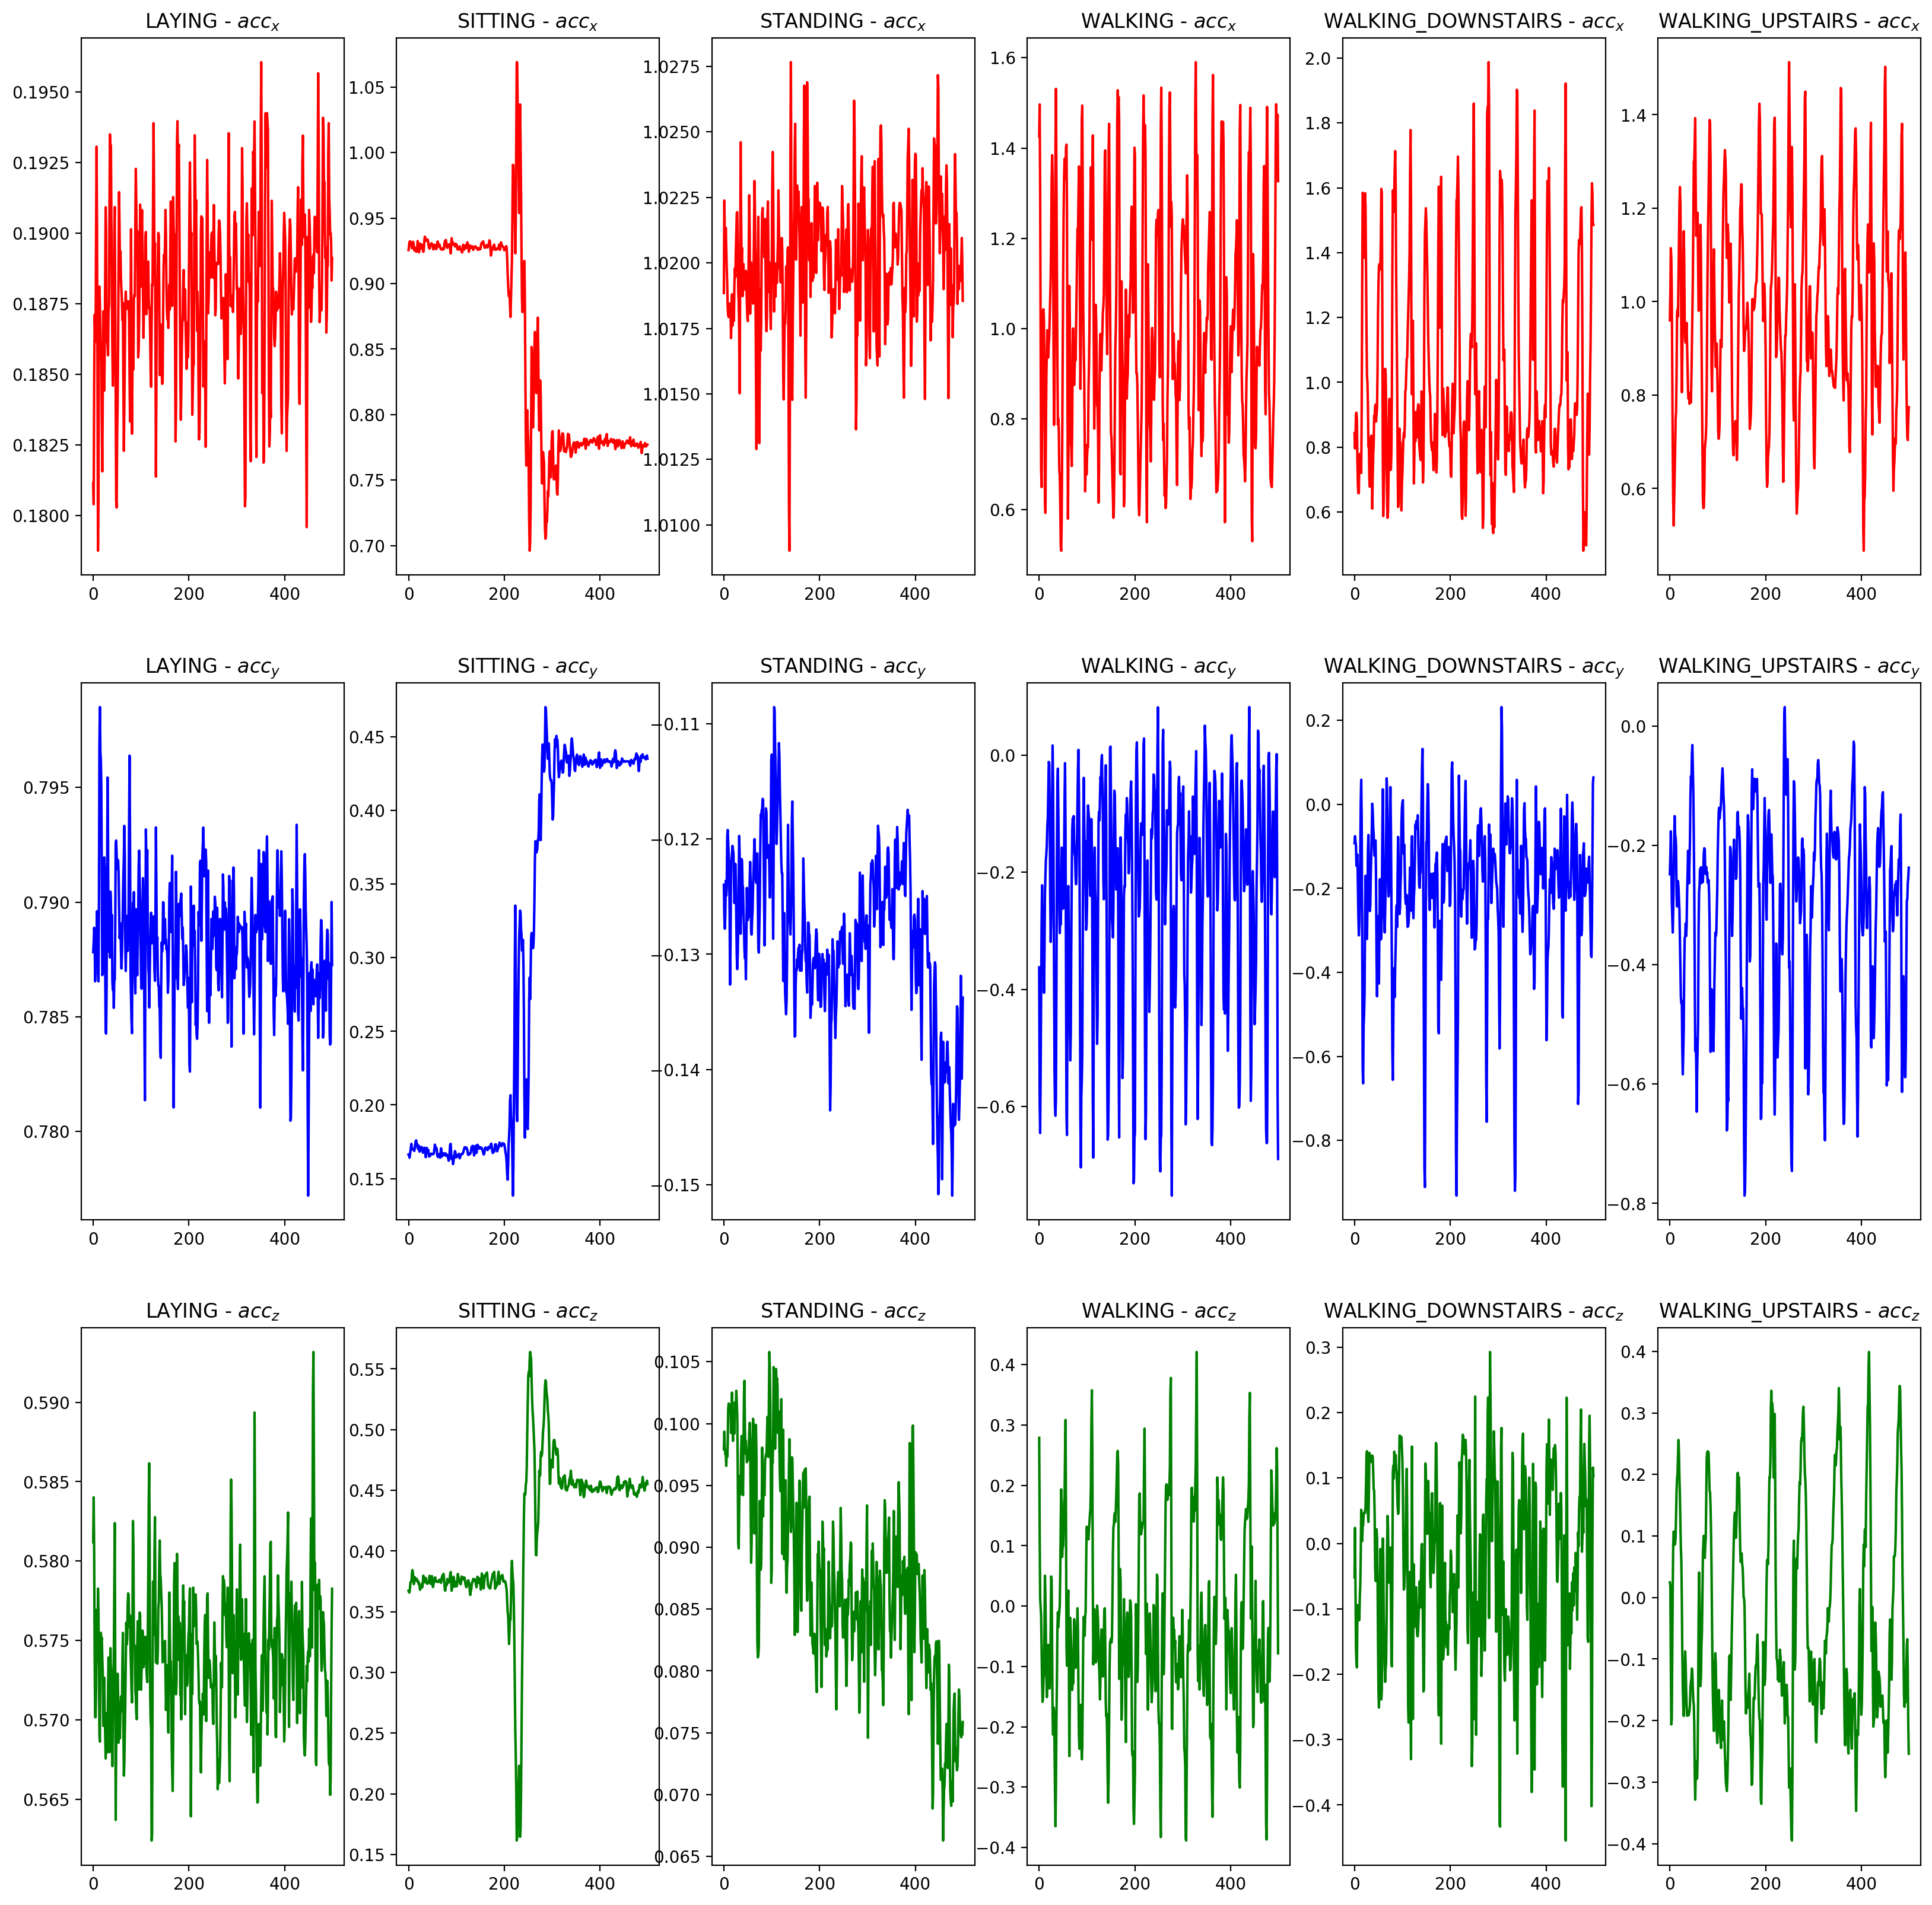

In [29]:
plt.figure(figsize=(20,20))
for i in range(6):
    activity = activities[i]
    data = x_train[i*21]
    acc_x = data[:,0]
    acc_y = data[:,1]
    acc_z = data[:,2]
    x = np.arange(0,500,1)
    plt.subplot(3,6,i+1)
    plt.plot(x,acc_x,c='r')
    plt.title(f"{activity} - $acc_x$")
    plt.subplot(3,6,i+7)
    plt.plot(x,acc_y,c='b')
    plt.title(f"{activity} - $acc_y$")
    plt.subplot(3,6,i+13)
    plt.plot(x,acc_z,c='g')
    plt.title(f"{activity} - $acc_z$")
plt.show()

In [30]:
total_acceleration = x_train[:,:,0]**2 + x_train[:,:,1]**2 + x_train[:,:,2]**2
total_acceleration_x_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2
for i in range(len(activities)):
    activity=activities[i]
    var_ = total_acceleration[i*21].var()
    mean_ = total_acceleration[i*21].mean()
    print(f"Mean total acceleration for activity {activity} = {mean_}")
    print(f"Variance in  total acceleration for activity {activity} = {var_}")

Mean total acceleration for activity LAYING = 0.9860041348456543
Variance in  total acceleration for activity LAYING = 2.8397271960160696e-05
Mean total acceleration for activity SITTING = 1.0155730317634546
Variance in  total acceleration for activity SITTING = 0.0013195388263560468
Mean total acceleration for activity STANDING = 1.0651446745037902
Variance in  total acceleration for activity STANDING = 2.5184611553195693e-05
Mean total acceleration for activity WALKING = 1.1896363025467223
Variance in  total acceleration for activity WALKING = 0.34173146968972834
Mean total acceleration for activity WALKING_DOWNSTAIRS = 1.204763187394195
Variance in  total acceleration for activity WALKING_DOWNSTAIRS = 0.6583017084147446
Mean total acceleration for activity WALKING_UPSTAIRS = 1.1484399512674806
Variance in  total acceleration for activity WALKING_UPSTAIRS = 0.22998141227853178


In [33]:
print(total_acceleration.shape)
total_acceleration_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2
print(total_acceleration_test.shape)

(126, 500)
(54, 500)


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(total_acceleration)
pca_data = pca.transform(total_acceleration)
pca_data.shape

(126, 2)

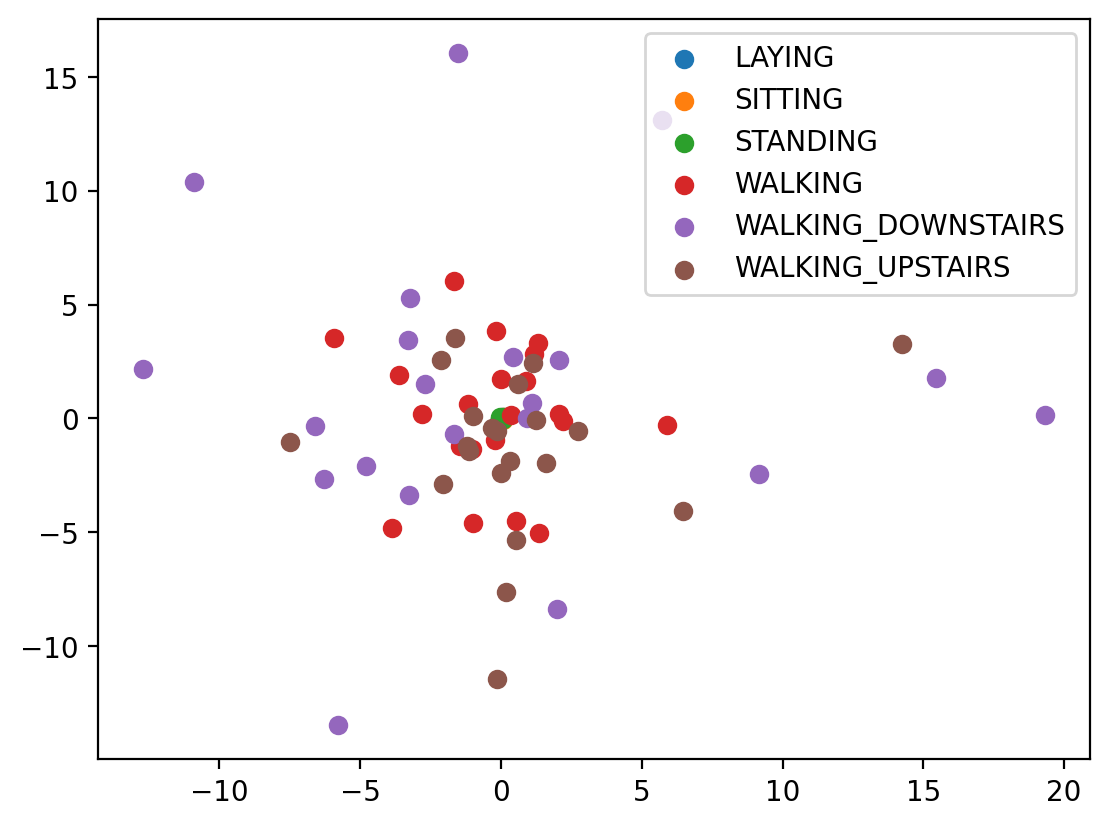

In [38]:
for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(pca_data[i*21:(i+1)*21,0],pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

In [36]:
!pip install tsfel

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   --------- ------------------------------ 1.0/4.2 MB 6.0 MB/s eta 0:00:01
   ------------------------ --------------- 2.6/4.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 6.9 MB/s  0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 6.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 7.2 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 7.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 7.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.7 MB/s  0:00:01

   ---------------------------------------- 0/4 [PyWavelets]
   ---------------------------------------- 0/

In [39]:
import tsfel    
import tsfel.feature_extraction.features

In [40]:
import tsfel
import pandas as pd
import numpy as np

def extract_features(data, sampling_rate=50):
   
    # Load TSFEL comprehensive feature configuration
    cfg = tsfel.get_features_by_domain()

    all_features = []
    for i in range(len(data)):
        # Convert each time series to a pandas Series
        signal = pd.Series(data[i])

        # Extract features for this sample
        features = tsfel.time_series_features_extractor(cfg, signal, fs=sampling_rate)
        
        # Convert to numpy for storage
        all_features.append(features.values.flatten())

    # Convert entire list to a DataFrame
    features_df = pd.DataFrame(all_features, columns=features.columns)
    return features_df


In [41]:
tsfel_features_train = extract_features(total_acceleration)
tsfel_features_test = extract_features(total_acceleration_test)

print("Training features shape:", tsfel_features_train.shape)
print("Testing features shape:", tsfel_features_test.shape)

Training features shape: (126, 156)
Testing features shape: (54, 156)


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(tsfel_features_train)
tsfel_pca_data = pca.transform(tsfel_features_train)
tsfel_pca_data.shape

(126, 2)

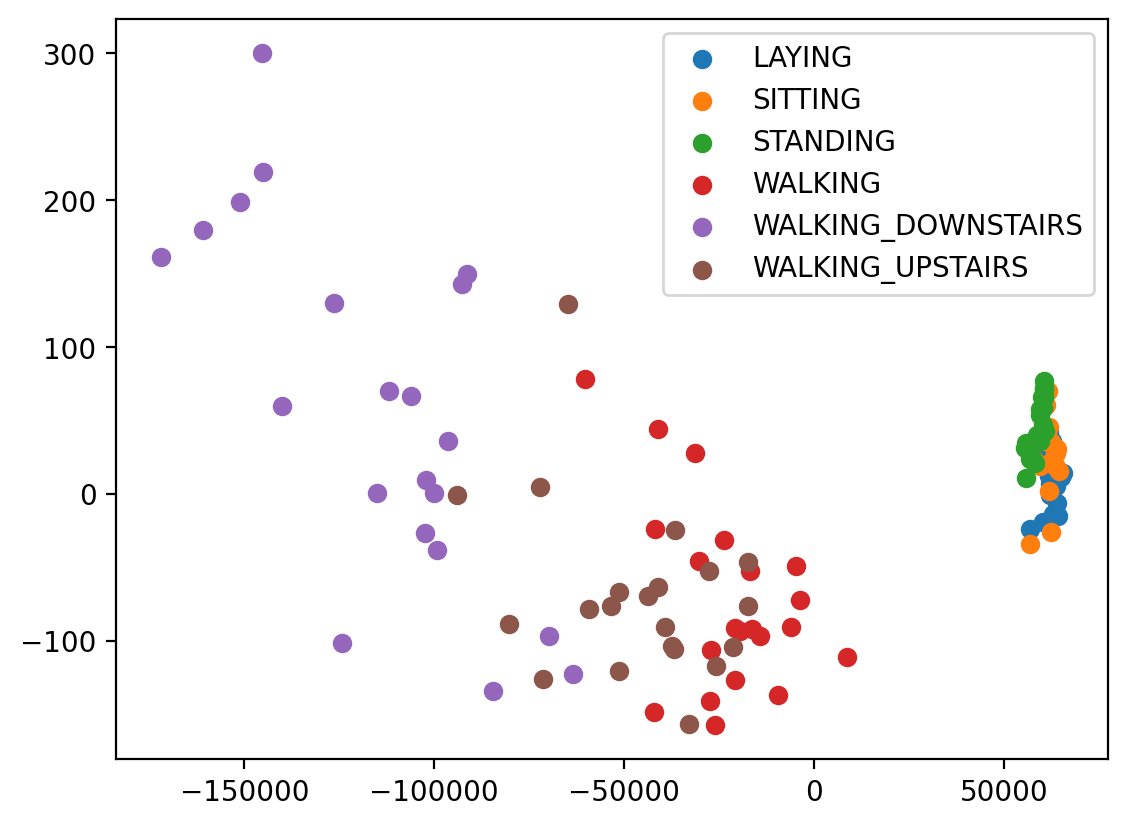

In [46]:
for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(tsfel_pca_data[i*21:(i+1)*21,0],tsfel_pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

In [55]:
X_train_features = np.loadtxt('../UCI HAR Dataset/train/X_train.txt')
X_train_features.shape

(7352, 561)

In [54]:
y_train_features = np.loadtxt('../UCI HAR Dataset/train/y_train.txt')
y_train_features.shape

(7352,)

In [56]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_features)
X_train_pca_data = pca.transform(X_train_features)
X_train_pca_data.shape

(7352, 2)

In [59]:
activities_map = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

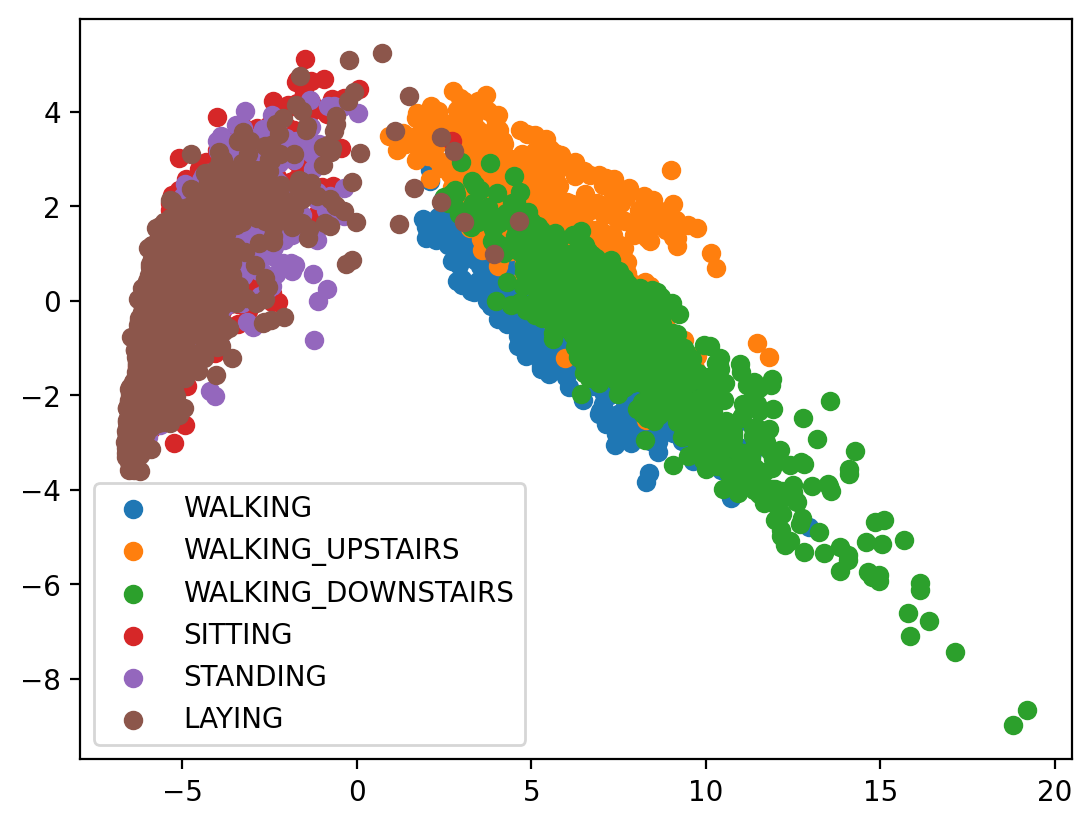

In [60]:
for i in range(1,7):
    plt.scatter(X_train_pca_data[y_train_features==i,0],X_train_pca_data[y_train_features==i,1],label=activities_map[i])
    plt.legend()

1.The PCA on the total_acceleration is very scattered and the different activities have very high overlapping region in that graph.

2.Whereas, the PCA on TSFEL featurized data and on features provided in the data have better plots as different activities can be clearly distinguished in different clusters with less overlap.

3.Either of the TSFEL or dataset provided by the features is good for visualising the data

In [62]:
os.listdir()
features = np.loadtxt('../UCI HAR Dataset/features.txt',dtype=str)
features = features[:, 1]

In [ ]:

dataset_features_train_df = pd.DataFrame(X_train_features,columns=features)